In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


data inspection

In [4]:
len(train_data)
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
train_labels[10]

3

vectorize labels

In [8]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

make models

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
#More layers because more classifiers
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
#46 differenent classifiers
#use softmax to output probability of different lables
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Validation

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train

In [12]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 525us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 110us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


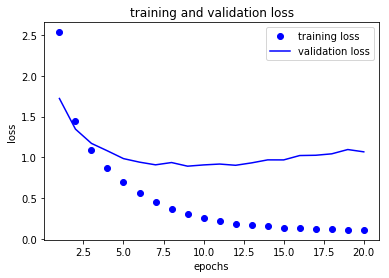

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Note: Choose a lot of epochs initially and choose the point where the validation loss is at it's lowest

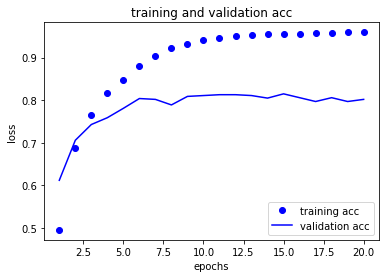

In [18]:
plt.clf
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

We're gonna retrain this to 9 epochs

In [22]:
model = models.Sequential()
#More layers because more classifiers
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
#46 differenent classifiers
#use softmax to output probability of different lables
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 177us/step - loss: 2.8535 - acc: 0.4022 - val_loss: 1.9506 - val_acc: 0.6340
Epoch 2/9
7982/7982 [==============================] - 1s 101us/step - loss: 1.5744 - acc: 0.6898 - val_loss: 1.3817 - val_acc: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 106us/step - loss: 1.1286 - acc: 0.7676 - val_loss: 1.1845 - val_acc: 0.7390
Epoch 4/9
7982/7982 [==============================] - 1s 104us/step - loss: 0.8774 - acc: 0.8226 - val_loss: 1.0474 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.6982 - acc: 0.8559 - val_loss: 0.9800 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.5531 - acc: 0.8899 - val_loss: 0.9446 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.4479 - acc: 0.9100 - val_loss: 0.9432 - val_acc: 0.8090
Epoch 8

In [23]:
results

[0.9764160778728428, 0.7920747996703493]

Let's do some predictions

In [24]:
predictions = model.predict(x_test)
predictions[0]

array([5.83791643e-06, 1.62784389e-04, 8.26224205e-05, 6.53137982e-01,
       3.32583249e-01, 2.79405140e-06, 4.48866413e-05, 1.02454123e-05,
       3.46732070e-03, 1.43038715e-05, 4.18042910e-05, 8.92013311e-04,
       9.77926757e-05, 8.46393639e-04, 1.31777460e-05, 4.76940331e-05,
       1.45488291e-03, 3.85677879e-04, 1.76378271e-05, 2.44104862e-03,
       2.35473318e-03, 1.61512173e-04, 1.90438925e-06, 4.61598138e-05,
       5.20847834e-06, 9.48341840e-05, 6.14894498e-06, 1.57409465e-06,
       2.44538474e-04, 1.14187598e-04, 3.08499330e-05, 7.97129032e-05,
       2.15820895e-04, 1.56775059e-05, 1.28149150e-05, 7.44845966e-06,
       3.10201431e-04, 4.94224878e-06, 1.29230139e-05, 3.21442814e-04,
       2.21322643e-05, 1.16279509e-04, 5.41495137e-05, 1.14312197e-05,
       1.77398272e-06, 1.22599261e-06], dtype=float32)

Experiments

In [28]:
model = models.Sequential()
#More layers because more classifiers
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
# 10000 is obviously too big, accuracy seems to peak at 64
model.add(layers.Dense(10000, activation='relu'))
#46 differenent classifiers
#use softmax to output probability of different lables
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 211us/step - loss: 2.1218 - acc: 0.4909 - val_loss: 1.3602 - val_acc: 0.6670
Epoch 2/9
7982/7982 [==============================] - 1s 114us/step - loss: 1.1504 - acc: 0.7187 - val_loss: 1.1653 - val_acc: 0.7130
Epoch 3/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.8028 - acc: 0.7959 - val_loss: 1.0255 - val_acc: 0.7620
Epoch 4/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.5891 - acc: 0.8474 - val_loss: 0.9992 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 112us/step - loss: 0.4061 - acc: 0.8918 - val_loss: 0.9837 - val_acc: 0.7870
Epoch 6/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.2959 - acc: 0.9211 - val_loss: 1.0844 - val_acc: 0.7760
Epoch 7/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.2163 - acc: 0.9439 - val_loss: 1.1191 - val_acc: 0.7790
Epoch 8

[1.2342947894509946, 0.7796081923419412]